# Testing speed of piecewise functions

In [1]:
import numpy as np
from slab import SlabExact
from scipy.optimize import newton
from timeit import timeit

In [2]:
xs = np.linspace(-5,5,100)

In [3]:
Rhos = [-10, 0, 3, 8]
conds = [(Rhos[i] <= xs)*(xs <= Rhos[i+1]) for i in range(len(Rhos)-1)]

In [4]:
x = np.array([-1,0,1])

np.piecewise(x, [x <= 0, x >= 0], [-1, 1])


array([-1,  1,  1])

Test on current slab 

In [5]:
A = SlabExact(symmetric=True)

In [6]:
field_type = 'TM'
mode_type = 'guided'

In [7]:
beta1 = newton(A.determinant, 4.75, args=('TM', mode_type))
beta2 = newton(A.determinant, 5.1, args=('TM', mode_type))

beta3 = newton(A.determinant, 4.75, args=('TE', mode_type))
beta4 = newton(A.determinant, 5.1, args=('TE', mode_type))

beta1, beta2, beta3, beta4

((4.731416702671911+8.988569602447734e-18j),
 (5.096576273716205+5.435874065949148e-19j),
 (4.767530368632624+1.1013871733524578e-17j),
 (5.113615861790036-2.539410611341006e-17j))

In [8]:
Fs_list = A.fields(beta1, field_type='TM', mode_type=mode_type, single_function=False)
Fs_single = A.fields(beta1, field_type='TM', mode_type=mode_type, single_function=True)

In [9]:
conds = A.condition_list(A.all_Xs+0*1j)

In [10]:
# %timeit np.piecewise(A.all_Xs+0j, conds, Fs_list)

In [11]:
# %timeit Fs_single(A.all_Xs)

It ended up being a bit faster, but more importantly it was cleaner code, so I used it.

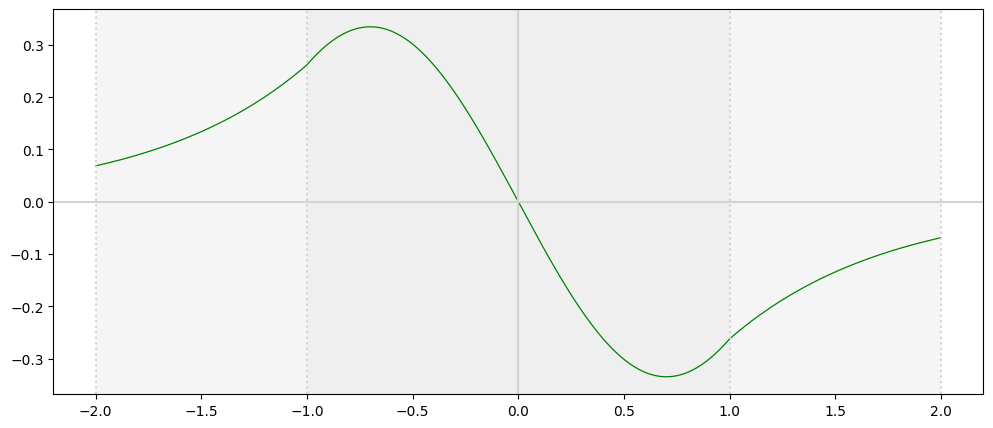

In [12]:
A.plot_field_1d(Fs_single, plot_axis=True, linewidth=.9, color='g', label='TM_odd', plot_regions=True, hatch=None)


In [13]:
import matplotlib.pyplot as plt

In [14]:
plt.close('all')

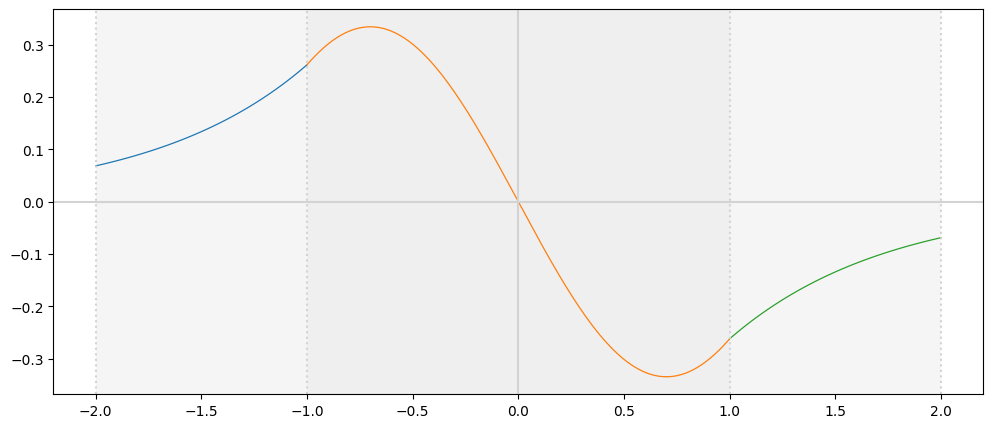

In [15]:
 A.plot_field_1d(Fs_list, plot_axis=True, linewidth=.9, label='TM_odd', plot_regions=True, hatch=None)


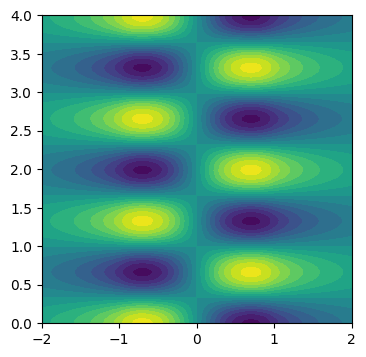

In [16]:
A.plot_field_2d(Fs_single, levels=20)

In [17]:
Fs_single(1,[3,4])


ValueError: non-broadcastable output operand with shape (1,) doesn't match the broadcast shape (2,)